<a href="https://colab.research.google.com/github/Sousa-Marco/Data-Python/blob/main/14_Sea_Levels_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sea-Level predictor project

---


This is a freeCodeCamp project

### Data Source
Global Average Absolute Sea Level Change, 1880-2014 from the US Environmental Protection Agency using data from CSIRO, 2015; NOAA, 2015.
https://datahub.io/core/sea-level-rise

The data describes annual sea levels from 1880 to 2013.  Measures are adjusted using two standards: Commonwealth Scientific and Industrial Research Organisation(CSIRO) and National Oceanic and Atmospheric Administration (NOAA)  

Raw Data file:  https://raw.githubusercontent.com/freeCodeCamp/boilerplate-sea-level-predictor/master/epa-sea-level.csv

---
### Exercise 1 - Load in the data
---

Load in the sea-levels data and have a look, dont forget to check the numerical and technical summaries and get a feel for the dataset

In [12]:
import pandas as pd
from scipy.stats import linregress
import matplotlib.pyplot as plt
%matplotlib inline

#store the url for the raw data file in a variable "url"
url = 'https://raw.githubusercontent.com/freeCodeCamp/boilerplate-sea-level-predictor/master/epa-sea-level.csv'

#read the data file and store it on a varialbe called "sea_level_df"
sea_level_df = pd.read_csv(url)

#display a summary of the numerical data
display(sea_level_df.describe())

#display a summary of the technical data
display(sea_level_df.info())

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
count,134.000000,134.000000,134.000000,134.000000,21.000000
mean,1946.500000,3.650341,3.204666,4.096016,7.363746
std,38.826537,2.485692,2.663781,2.312581,0.691038
min,1880.000000,-0.440945,-1.346457,0.464567,6.297493
25%,1913.250000,1.632874,1.078740,2.240157,6.848690
50%,1946.500000,3.312992,2.915354,3.710630,7.488353
75%,1979.750000,5.587598,5.329724,5.845472,7.907365
max,2013.000000,9.326772,8.992126,9.661417,8.546648


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      134 non-null    int64  
 1   CSIRO Adjusted Sea Level  134 non-null    float64
 2   Lower Error Bound         134 non-null    float64
 3   Upper Error Bound         134 non-null    float64
 4   NOAA Adjusted Sea Level   21 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 5.4 KB


None

#Comment on output

This is a fairly large dataset with 134 entries. It collects data relating to sea level from 1880 to 2013. The other variables include lower and upper error bounds and two types of sea level measurements - CSIRO and NOAA. The latter only has 21 datapoints.

---
### Exercise 2 - scatter plot
Create a  scatter plot using the "Year" column as the x-axis and the "CSIRO Adjusted Sea Level" column as the y-axis.

*hint: try using inline*

Text(0, 0.5, 'CSIRO Adjusted Sea Level')

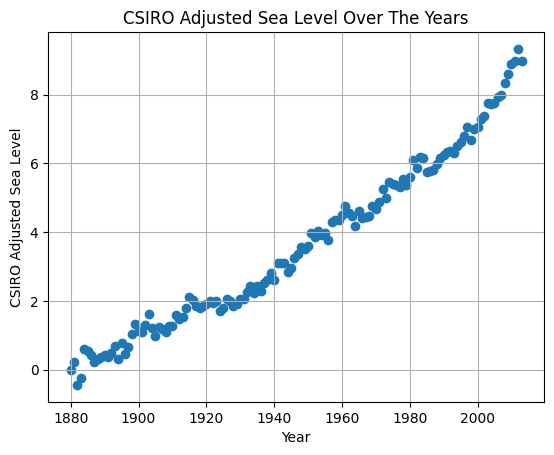

In [11]:
x = sea_level_df['Year']

y = sea_level_df['CSIRO Adjusted Sea Level']

plt.scatter(x, y)

plt.title('CSIRO Adjusted Sea Level Over The Years')

plt.grid(True)

plt.xlabel('Year')

plt.ylabel('CSIRO Adjusted Sea Level')


#Comment on output

This scatter plot shows the spread of the sea level data over the years 1880-2013. There is a noticeable upwards trend over time with few outlier datapoints. Since the start of this data collection process until thje latest date, the value of the sea level has approxamately doubled every 20 years.

---
### Exercise 3 - Clean the data

The column NOAA has null values in a number of rows.  Clean the data, producing a new dataframe.


In [14]:
#Create new dataframe without null values in NOAA column
clean_sea_level_df = sea_level_df.dropna(subset=['NOAA Adjusted Sea Level'])

#display the information about the cleaned dataframe
display(clean_sea_level_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21 entries, 113 to 133
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      21 non-null     int64  
 1   CSIRO Adjusted Sea Level  21 non-null     float64
 2   Lower Error Bound         21 non-null     float64
 3   Upper Error Bound         21 non-null     float64
 4   NOAA Adjusted Sea Level   21 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 1008.0 bytes


None

#Comments on the output:

This code used the 'dropna' method to remove the rows with null values in the NOAA column and create a new dataframe. It reduced the number of datapoints to 21.


### Exercise 3 - plot scatter graph for NOAA adjusted levels
---


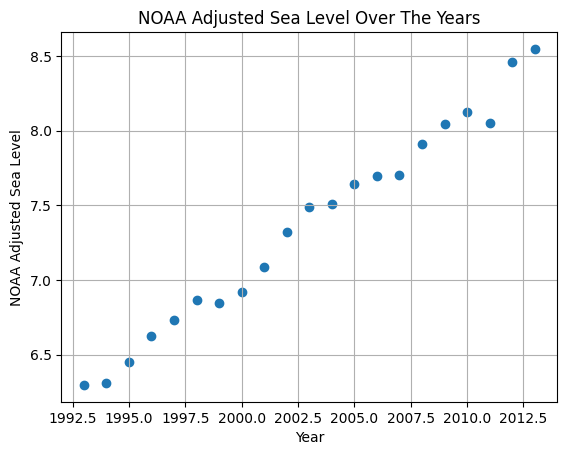

In [16]:
a = clean_sea_level_df['Year']

b = clean_sea_level_df['NOAA Adjusted Sea Level']

plt.scatter(a, b)

plt.title('NOAA Adjusted Sea Level Over The Years')

plt.grid(True)

plt.xlabel('Year')

plt.ylabel('NOAA Adjusted Sea Level')

plt.show()

#Comment on the output

The scatter plot of the cleaned dataframe looking at NOAA values only continues to demonstrate an increase over the years. The cleaned dataset has fewer datapoints (n=21) and thus a smaller range of years for data collection. There are no obvious outliers.

---
### Exercise 4 - plot line of best fit for CSIRO

*   Use the `linregress` function from `scipi.stats` to get the slope and y-intercept of the line of best fit.
*   Plot the line of best fit over the top of the scatter plot.
*   Make the line go through the year 2050 to predict the sea level rise in 2050.    

*(Hint:  use numpy to create an array from the first year to 2050 with an increment of 1)*


Regression information:



LinregressResult(slope=0.0630445840121348, intercept=-119.06594196773978, rvalue=0.984757131182585, pvalue=3.7886969791131554e-102, stderr=0.000969211871328715, intercept_stderr=1.8869433812425225)


Slope:



0.0630445840121348


Intercept:



-119.06594196773978

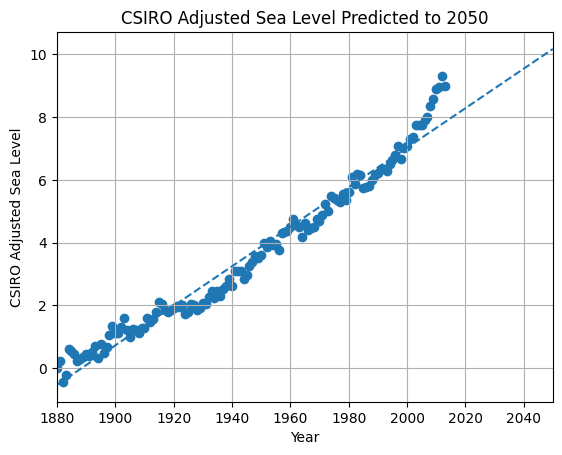

In [27]:
import numpy as np

# get slope and y-intercept
regression = linregress(x, y)

print("\nRegression information:\n")
display(regression)

slope = regression.slope

intercept = regression.intercept

print("\nSlope:\n")
display(slope)

print("\nIntercept:\n")
display(intercept)

# create an extended range for x to predict sea level in 2050
plt.xlim(1880, 2050)

future_years = np.arange(sea_level_df['Year'].min(), 2051, 1)

# draw the scatter plot with line of best fit
plt.scatter(x, y)

plt.title('CSIRO Adjusted Sea Level Predicted to 2050')

plt.grid(True)

plt.xlabel('Year')

plt.ylabel('CSIRO Adjusted Sea Level')

plt.plot(future_years, slope*future_years + intercept, linestyle = 'dashed')

plt.show()

#Comment on the output

The linear regression of the CSIRO data over time demonstrated an r value of 0.98 and p = 3.79 x 10^-102, indicating a statistically significant (p < 0.05) correlation between CSIRO adjusted sea levels and year.

This scatter plot shows the prediction of the CSIRO sea level rise until 2050. The line of best fit predicts that the CSIRO sea level will surpass 10 in 2050.

### Exercise 5 - plot line of best fit for NOAA
---

*   Use the `linregress` function from `scipi.stats` to get the slope and y-intercept of the line of best fit.
*   Plot the line of best fit over the top of the scatter plot.
*   Make the line go through the year 2030 to predict the sea level rise in 2030

*(Hint:  use numpy to create an array from the first year to 2030 with an increment of 1 AND remember to use noaa, which has NaN rows removed)*


Regression information:



LinregressResult(slope=0.1106587170922078, intercept=-214.2856645683589, rvalue=0.9936055686082959, pvalue=1.8241557397822628e-19, stderr=0.0028847979364250032, intercept_stderr=5.778276670973475)


Slope:



0.1106587170922078


Intercept:



-214.2856645683589

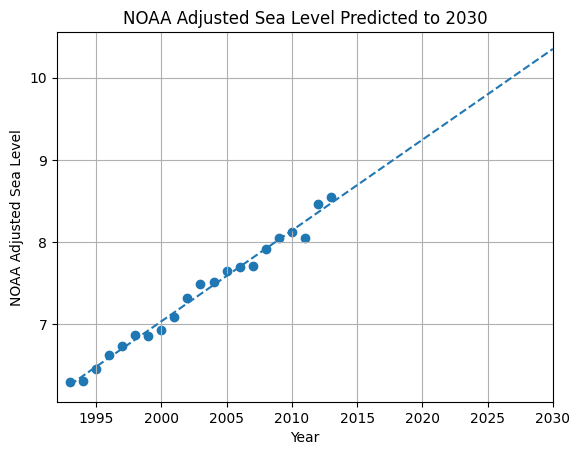

In [30]:
# get slope and y-intercept
regression = linregress(a, b)

print("\nRegression information:\n")
display(regression)

slope = regression.slope

intercept = regression.intercept

print("\nSlope:\n")
display(slope)

print("\nIntercept:\n")
display(intercept)

# create an extended range for x to predict sea level in 2030
plt.xlim(1992, 2030)

future_years = np.arange(clean_sea_level_df['Year'].min(), 2031, 1)

# draw the scatter plot with line of best fit
plt.scatter(a, b)

plt.title('NOAA Adjusted Sea Level Predicted to 2030')

plt.grid(True)

plt.xlabel('Year')

plt.ylabel('NOAA Adjusted Sea Level')

plt.plot(future_years, slope*future_years + intercept, linestyle = 'dashed')

plt.show()


#Comment on output

The regression of NOAA adjusted sea level data and year yielded an r = 0.99 and p = 1.82 x 10^-19. This demonstrates that there is a positive statistically significant (p < 0.05) relationship between the NOAA adjusted sea level and year.

This scatterplot shows the prediction of the NOAA sea level rise until 2030.

The scatterplot shows a line of best fit that predicts a NOAA sea level close to 11 in 2030.


### Exercise 6 - shorter range (starting 2000)
---

Plot a new line of best fit just using the data from year 2000 through the most recent year in the dataset and using the CSIRO adjusted levels. Make the line also go through the year 2050 to predict the sea level rise in 2050 if the rate of rise continues as it has since the year 2000.


Regression information:



LinregressResult(slope=0.1664272733318682, intercept=-325.7934668059649, rvalue=0.9762875716140618, pvalue=2.4388064141618245e-09, stderr=0.010652933111541163, intercept_stderr=21.375153425608215)


Slope:



0.1664272733318682


Intercept:



-325.7934668059649

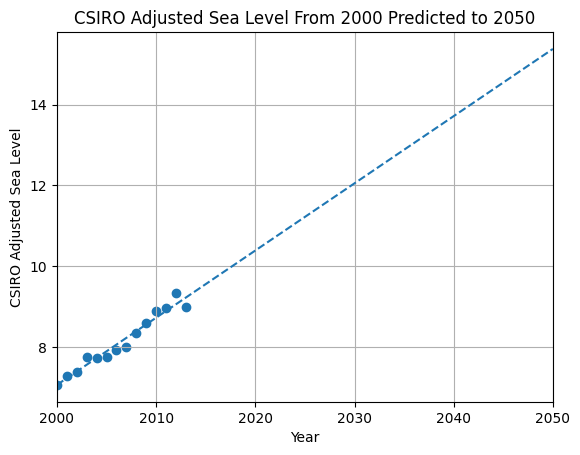

In [32]:
#create a new dataframe using only values from the year 2000 upwards
shorter_range_df = sea_level_df[sea_level_df['Year'] >= 2000]

c = shorter_range_df['Year']

d = shorter_range_df['CSIRO Adjusted Sea Level']

# get slope and y-intercept
regression = linregress(c, d)

print("\nRegression information:\n")
display(regression)

slope = regression.slope

intercept = regression.intercept

print("\nSlope:\n")
display(slope)

print("\nIntercept:\n")
display(intercept)

# create an extended range for x to predict sea level in 2050
plt.xlim(2000, 2050)

future_years = np.arange(shorter_range_df['Year'].min(), 2051, 1)

# draw the scatter plot with line of best fit
plt.scatter(c, d)

plt.title('CSIRO Adjusted Sea Level From 2000 Predicted to 2050')

plt.grid(True)

plt.xlabel('Year')

plt.ylabel('CSIRO Adjusted Sea Level')

plt.plot(future_years, slope*future_years + intercept, linestyle = 'dashed')

plt.show()


#Comment on the output

The regression between the CSIRO adjusted sea level and year (narrowed down to only include data from the year 2000) demonstrates an r value of 0.97 and p value of 2.43 x 10^-0.9. This shows that there is a positive correlation between the two variables and that this is stastically significant (p < 0.05).

The scatterplot contains the distribution of the CSIRO adjusted sea levels from the year 2000 and predicts its rise over time through a line of best fit that extends to 2050.

The line of best fit predicts that the CSIRO adjusted sea level will be close to 15 in 2050.

### Exercise 6 - add labels to the axes  
---

The x label should be "Year", the y label should be "Sea Level (inches)", and the title should be "Rise in Sea Level"

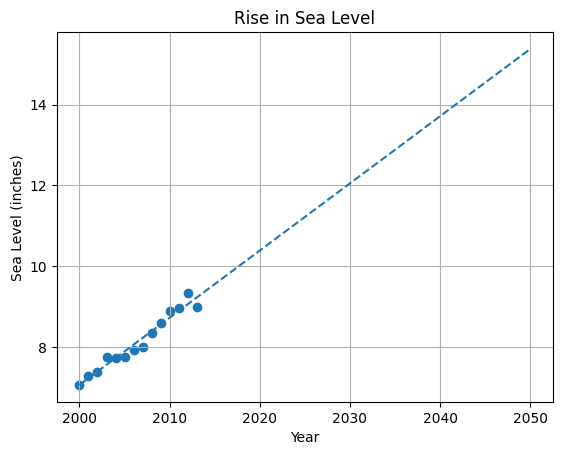

In [33]:
# The x label should be "Year"
plt.xlabel('Year')

# The y label should be "Sea Level (inches)"
plt.ylabel('Sea Level (inches)')

# The title should be "Rise in Sea Level"
plt.title('Rise in Sea Level')

# Plot the scatter graph
plt.scatter(c, d)

plt.grid(True)

plt.plot(future_years, slope*future_years + intercept, linestyle = 'dashed')

plt.show()

---

# Overall comment on project

This project was a tool to summarise my skills in data analysis. I started off by checking out the dataset from the US Environmental Protection Agency to try to figure out what's going on in the data.

I also cleaned up the data to zoom in on the more relevant parts. Then, I performed linear regressions to dig into the relationships between variables. I used scatterplots to make sense of the sea level changes over the years and even predicting what might happen down the line.

Of course, it wasn't all smooth sailing. Figuring out how to predict changes over time had its tricky moments.

In a nutshell, this project was a workout for my Python skills. Explored a specific dataset, cooked up some predictive models, and got a good feel for where I'm at and where I could go.